
# Project: Movie Data Analysis
>
> Liam Cottrell

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction  


In this project we will take a look at a dataset of movies provided by 'tmdb', an online movie database website, which defines itself as 'a community built movie and TV database.' This dataset that we have chosen to analyse contains data for over 10000 movies released between 1970 and 2015. The dataset also contains 21 columns with both qualitative and quantitative variables, ranging from cast and crew information to runtime and popularity scores. In this analysis, we will focus specifically on the budget, profit, vote average, release date and runtime variables, exploring the following questions:  

- How does the average vote change over time?
- How does the average profit change over time?
- How does runtime change over time, and does it affect profit?
- How does the Budget affect the Profit generated?
- How does the Vote Average affect the Gross Profit?
- How does the Date the film was released affect the Profit?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

### Loading the Data

>

In [3]:
df = pd.read_csv('tmdb-movies (2).csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### General Properties

> We need to perform a few operations to get a better idea of the dataset and what needs to be cleaned before continuing.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.shape

(10866, 21)


>This is a simple operation to give me the dimensions of the dataset

In [9]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>This operation was to check all of the columns have the correct data type. One thing to note here was that the 'release_date' column is currently an object, so it would need to be changed to a date-time object later in order to plot a graph and draw conclusions.

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



>This gives me further information on the range and distribution of values within the dataset, as well as the mean for each numerical column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


>Performing this operation lets us know of any columns with missing values.

In [12]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


>This operation allows us to see how many unique values are contained within each column.

### Data trimming

>After a full consideration of the dataset, I knew that I could drop the columns that I would not need in my final analysis.

In [13]:
df_clean = df.copy()

In [14]:
df_clean.drop(columns = ['vote_count', 'popularity', 'tagline', 'production_companies', 'overview', 'keywords', 'homepage', 'imdb_id', 'budget_adj', 'revenue_adj'], inplace = True)

In [15]:
df_clean

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller",6/9/15,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller",5/13/15,7.1,2015
2,262500,110000000,295238201,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller",3/18/15,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy",12/15/15,7.5,2015
4,168259,190000000,1506249360,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller",4/1/15,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0,0,The Endless Summer,"Michael Hynson,Robert August,Lord 'Tally Ho' B...",Bruce Brown,95,Documentary,6/15/66,7.4,1966
10862,20379,0,0,Grand Prix,"James Garner,Eva Marie Saint,Yves Montand,Tosh...",John Frankenheimer,176,"Action,Adventure,Drama",12/21/66,5.7,1966
10863,39768,0,0,Beregis Avtomobilya,"Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Z...",Eldar Ryazanov,94,"Mystery,Comedy",1/1/66,6.5,1966
10864,21449,0,0,"What's Up, Tiger Lily?","Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama,Joh...",Woody Allen,80,"Action,Comedy",11/2/66,5.4,1966



>This is the updated dataset.

### Data Cleaning

In [ ]:
# First I want to replace the instances of '|' with commas instead:
for c in df.select_dtypes(['object']).columns:
    df.loc[:,c] = df.loc[:,c].str.replace('|',',')

In [16]:
# Changing the datatypes of columns
df_clean['release_date'] = pd.to_datetime(df.release_date)
df_clean['id'] = df_clean.astype('str')

In [97]:
#creating a column with the release year and using it to check for unrealistic values:
df_clean['year'] = df_clean['release_date'].dt.year
df_clean[df_clean['year']>2015]

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,year,Gross_Profit


In [18]:
df_clean = df_clean[df_clean['year']<2015]


>We can see that the 'cast' column is missing 76 values, the director column is missing 44 and the 'genres' column is missing 23. These aren't numeric values that we could potentially replace, and so they will have to be dropped.

In [19]:
df_clean = df_clean[df_clean['cast'].isnull()==False]
df_clean = df_clean[df_clean['director'].isnull()==False]
df_clean = df_clean[df_clean['genres'].isnull()==False]

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10374 entries, 0 to 10819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10374 non-null  object        
 1   budget          10374 non-null  int64         
 2   revenue         10374 non-null  int64         
 3   original_title  10374 non-null  object        
 4   cast            10374 non-null  object        
 5   director        10374 non-null  object        
 6   runtime         10374 non-null  int64         
 7   genres          10374 non-null  object        
 8   release_date    10374 non-null  datetime64[ns]
 9   vote_average    10374 non-null  float64       
 10  release_year    10374 non-null  int64         
 11  year            10374 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB



>This operation drops the entire row containing a null value in any of the columns.

In [21]:
sum(df_clean.duplicated())

1


>We can use this operation to check for any duplicate rows. In this case we can see that there is one.

In [22]:
df_clean = df_clean[df_clean.duplicated()==False]


>Finally, we will change the datatypes to their correct format convert, which includes changing the 'release_date' column to datetime in order to aid manipulation in the next section.

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10373 entries, 0 to 10819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10373 non-null  object        
 1   budget          10373 non-null  int64         
 2   revenue         10373 non-null  int64         
 3   original_title  10373 non-null  object        
 4   cast            10373 non-null  object        
 5   director        10373 non-null  object        
 6   runtime         10373 non-null  int64         
 7   genres          10373 non-null  object        
 8   release_date    10373 non-null  datetime64[ns]
 9   vote_average    10373 non-null  float64       
 10  release_year    10373 non-null  int64         
 11  year            10373 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


In [24]:
df_clean

,id,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,year
0,135397,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller",2015-06-09,6.5,2015,2015
1,76341,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller",2015-05-13,7.1,2015,2015
2,262500,110000000,295238201,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller",2015-03-18,6.3,2015,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy",2015-12-15,7.5,2015,2015
4,168259,190000000,1506249360,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller",2015-04-01,7.3,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10815,31657,3000000,0,Coming Home,"Jane Fonda,Jon Voight,Bruce Dern,Penelope Milf...",Hal Ashby,127,"Drama,Romance,War",1978-02-15,5.8,1978,1978
10816,16378,0,0,The Rutles: All You Need Is Cash,"Eric Idle,John Halsey,Ricky Fataar,Neil Innes,...","Eric Idle,Gary Weis",76,Comedy,1978-03-22,6.0,1978,1978
10817,13963,0,321952,The Last Waltz,"Robbie Robertson,Rick Danko,Levon Helm,Richard...",Martin Scorsese,117,"Documentary,Music",1978-05-01,8.0,1978,1978
10818,39995,0,0,Long Weekend,"John Hargreaves,Briony Behets,Mike McEwen,Roy ...",Colin Eggleston,92,"Horror,Thriller,Mystery",1978-10-14,6.1,1978,1978


Lastly I want to define a new column as Gross Profit, calculated from the revenue and budget columns

In [106]:
df_clean['Gross_Profit'] = df_clean['revenue'] - df_clean['budget']

<a id='eda'></a>
## Exploratory Data Analysis

Firstly I will define functions to work out statistics for the following graphs

In [100]:
def std(column1):
    std = df_clean[column1].std()
    return std

In [101]:
def mode(column1):
    mode = df_clean[column1].mode()
    return mode

In [102]:
def med(column1):
    med = df_clean[column1].median()
    return med

In [103]:
def mean(column1):
    mean = df_clean[column1].mean()
    return mean

### Release Date Distribution

Text(0, 0.5, 'frequency')

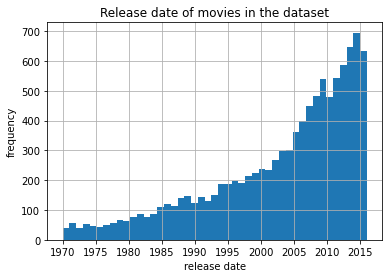

In [119]:
hist_plot = df_clean['release_date'].hist(bins=45)
plt.title('Release date of movies in the dataset')
plt.xlabel('release date')
plt.ylabel('frequency')

In [114]:
mean("release_year")

2002.523956425335

In [115]:
med("release_year")

2006.0

In [116]:
std("release_year")

11.038346445509307

The information in the release date histogram shows a skew to the left, with a median value nearly 3.5 years higher than the mean. We can see a pretty consistent increase, over the years, and in fact, the general trend seems to show that the rate are which mpvie output is increasing is also increasing as time goes on.

### Budget Distribution

Text(0, 0.5, 'frequency')

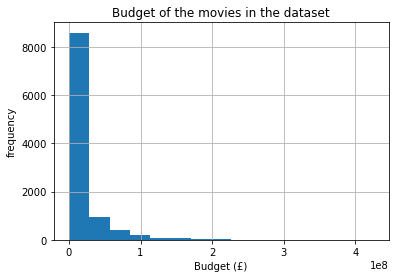

In [35]:
hist_plot = df_clean['budget'].hist(bins=15)
plt.title('Budget of the movies in the dataset')
plt.xlabel('Budget (£)')
plt.ylabel('frequency')

In [120]:
mean("budget")

15258817.703171697

In [121]:
med("budget")

0.0

In [122]:
mode("budget")

0    0
dtype: int64

> Here we can see that the budget is very skewed to the right, with a mean of £15.3 million compared to a median of £0. This means that more than half of the dataset is made up movies without a budget at all.

### Gross Profit Distribution

Text(0, 0.5, 'frequency')

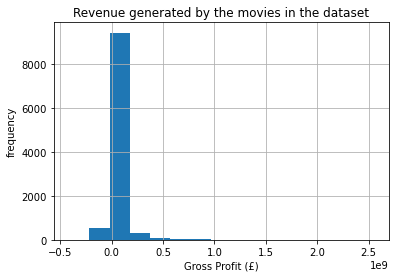

In [98]:
hist_plot = df_clean['Gross_Profit'].hist(bins=15)
plt.title('Revenue generated by the movies in the dataset')
plt.xlabel('Gross Profit (£)')
plt.ylabel('frequency')

In [108]:
mean("Gross_Profit")

26161858.925190397

In [109]:
med("Gross_Profit")

0.0

In [110]:
mode("Gross_Profit")

0    0
dtype: int64

> Here we can see that the revenue is massively skewed to the right in a similar way to the previous histogram, except with an even higher disparity between the mean and the median. Once again, more than half of the movies in the data appeared to make no money.

Text(0, 0.5, 'frequency')

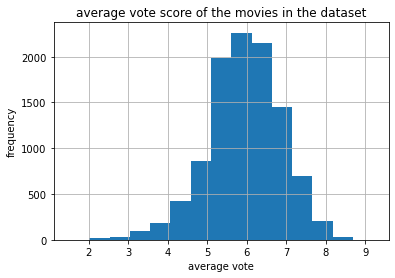

In [43]:
hist_plot = df_clean['vote_average'].hist(bins=15)
plt.title('average vote score of the movies in the dataset')
plt.xlabel('average vote')
plt.ylabel('frequency')

In [44]:
mean("vote_average")

5.974921774342001

In [45]:
med("vote_average")

6.0

In [46]:
mode("vote_average")

0    6.1
dtype: float64

In [47]:
std("vote_average")

0.9351418153269514

> The vote_average is normally distributed as we would expect for a large value of randomly generated numbers base purely on the subjective opinion of the audience. It is slightly skewed to the left however, as the audience tended to rate the average film a 6 rather than a 5. With a standard deviation of 0.93, that means more than 95% of the votes scored the films between a 4 and an 8.

Text(0.5, 0, 'Frequency')

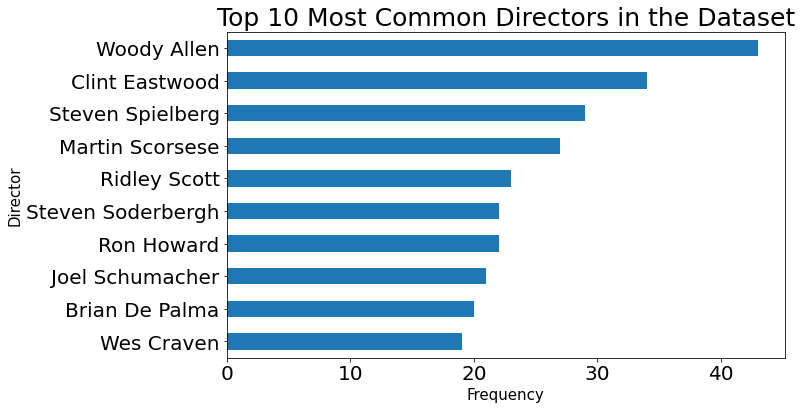

In [91]:
# plotting the 10 most frequently occuring directors in the dataset: 
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Common Directors in the Dataset", size=25)
df_clean['director'].value_counts()[9::-1].plot(kind='barh',fontsize=20);
plt.ylabel('Director', fontsize = 15)
plt.xlabel('Frequency', fontsize = 15)

We can see that Woody Allen is by far the most frequently occuring director with only Clint Eastwood, Steven Spielberg and Martin Scorcese present more than half as often as him.

Text(0.5, 0, 'Frequency')

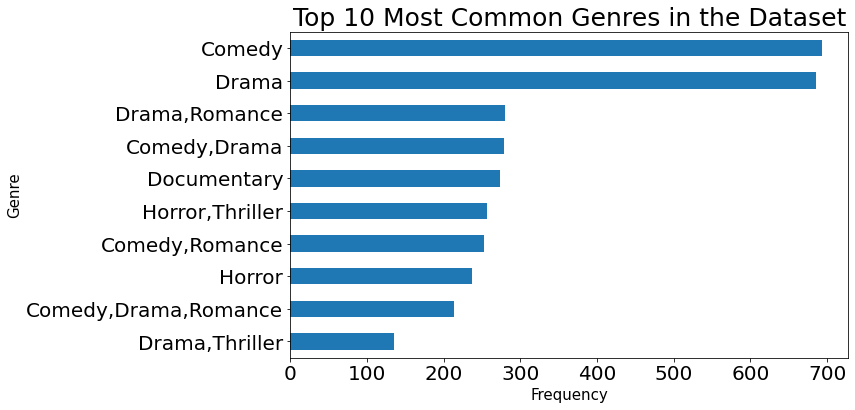

In [92]:
# Plotting the most popular genres
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Common Genres in the Dataset", size=25)
df_clean['genres'].value_counts()[9::-1].plot(kind='barh',fontsize=20);
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Frequency', fontsize = 15)

Comedies and dramas are by far the most common films in the dataset, featuring more than twice as often as any other genre

## Findings

### How does the Vote Average change over time?

seeing as we want to see how the vote average changes both year on year as well as over the course of the dataset, I will use a line graph to help visualize.

In [94]:
# Working out the mean vote average score over the years and assigning to new variable
avg_vote = df_clean.groupby('year')['vote_average'].mean()

Text(0.5, 1.0, 'Vote Average by year')

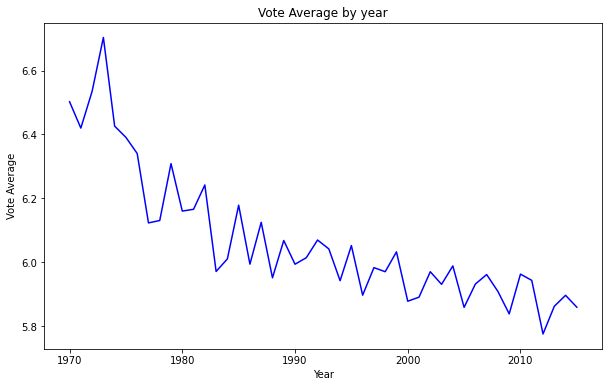

In [95]:
# plotting the graph of Vote Average over time
avg_vote.plot(kind='line',color='blue',figsize = (10,6))
plt.ylabel('Vote Average')
plt.xlabel('Year')
plt.title('Vote Average by year')

As we can see, interestingly the vote average appears to be on the decline as the years go by, with a movie from 2015 scoring approximately 0.6 lower than the average film in 1970. It isn't a linear drop, as the ratings spike from year to year, but the overall trend clearly shows that the vote average for more modern movies is lower than that for older movies.

### How does the average profit change over time?

In [52]:
# defining avg_prof to be the mean profit for a film in a given year
avg_prof = df_clean.groupby('year')['Gross_Profit'].mean()

Text(0.5, 1.0, 'Average Profit by year')

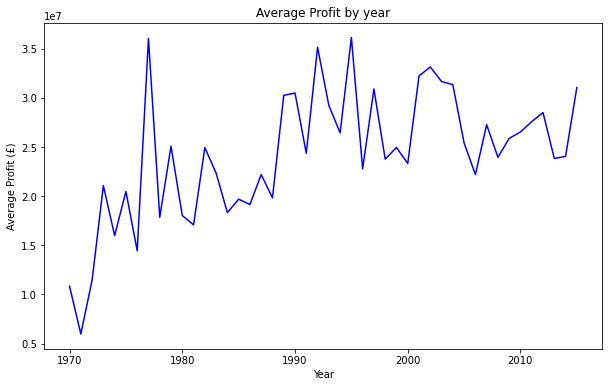

In [72]:
# creating plot for Average Profit vs Year
avg_prof.plot(kind='line',color='blue',title='Average Profit VS Years',figsize = (10,6))
plt.ylabel('Average Profit (£)')
plt.xlabel('Year')
plt.title('Average Profit by year')

We can see from this plot that over time, the average profit seems to be increasing, atleast from 1970 to 1990. The data is less clear beyond this point however as the average profit in 2015 is roughly equal to that in 1990, and it has spiked to higher levels than in 2015 on 3 occasions in between 1990 and 2015.

Now I will restrict the dataset to contain only films that had a budget, and see if it has an effect on the outcome:

In [ ]:
df_bud = df_clean[df_clean['budget']>0]

In [54]:
# creating the same graph using the restricted dataset containing only those movies with a budget
avg_prof_res = df_bud.groupby('year')['Gross_Profit'].mean()

Text(0.5, 1.0, 'Average Profit by year')

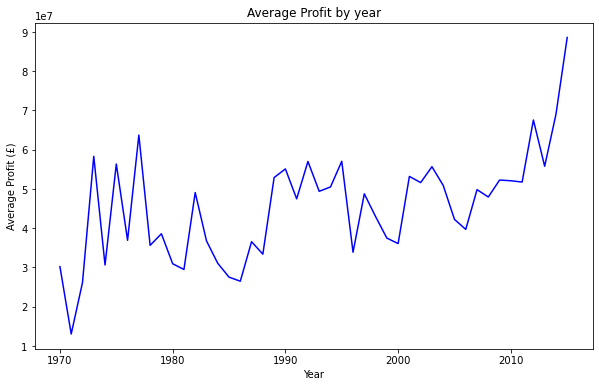

In [73]:
avg_prof_res.plot(kind='line',color='blue',title='Average Profit VS Years',figsize = (10,6))
plt.ylabel('Average Profit (£)')
plt.xlabel('Year')
plt.title('Average Profit by year')

The plot is similar, showing a general increase over the years, however we can see from this plot that the average profit is quite clearly highest in 2015. The average profit of the majority of the dataset has also doubled for most of the datapoints. What this shows is that the data previously was being affected by the high volume of indendent movies with no budget, and the fact that the values beyond 2010 were affected so heavily suggests more of these zero budget independent movies are being made beyond 2010.

### How does runtime change over the years, and does it affect profit?

As I want to see the relationship between two numeric variables, I will use the seaborn regplot, and add the gross profit as a legend to visualise how it changes with the two variables.

In [56]:
# creating a random sample so that the graph isn't overcrowded.
np.random.seed(2018)
sample = np.random.choice(df_clean.shape[0], 1500, replace = False)
df_clean_subset = df_clean.iloc[sample]

C:\Users\liamc\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(60.0, 200.0)

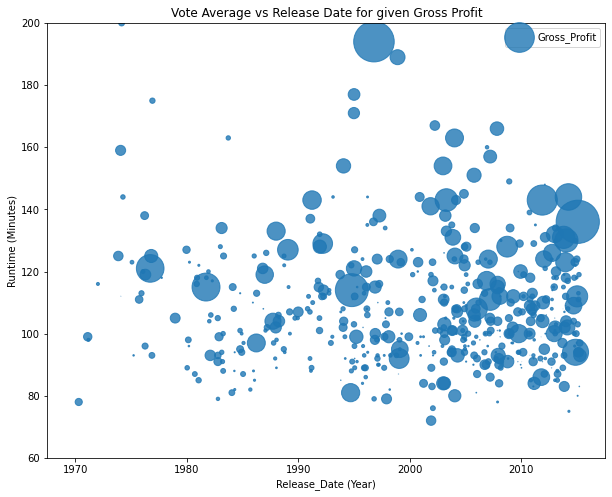

In [75]:
# creating plot for vote average over the years, with gross profit as a legend.
plt.figure(figsize = (10,8))
sb.regplot(data = df_clean_subset, x = 'year', y = 'runtime',
          x_jitter = 0.3, fit_reg = False,
               scatter_kws = {'s' : df_clean_subset['Gross_Profit']/1000000});
plt.xlabel('Release_Date (Year)')
plt.ylabel('Runtime (Minutes)')
plt.legend(['Gross_Profit'])
plt.title('Vote Average vs Release Date for given Gross Profit')
plt.ylim(60,200)

From the above graph it is difficuly to say how the runtime has changed over the years, It appears that the average postion beyond 1990 may be lower than the years preceding, but we will need another plot of the average runtime over the years to be sure. In terms of gross profit, we can see that there are clearly more high grossing movies in the latter half of the dataset, although due to the inceased number of films, it is again difficult to say whether it has increased as a proportion of films released. One interesting thing we notice is that surprisingly films that exceed 2 hours actually have a much higher proportion of high grossing films.

Now we will visualise the average runtime vs the year ona line graph instead, so we can get a better idea of how the average runtime is changing.

In [77]:
# Finding the mean runtime values for each year for the restricted dataset
avg_run = df_clean.groupby('year')['runtime'].mean()

Text(0.5, 1.0, 'Average Runtime by year')

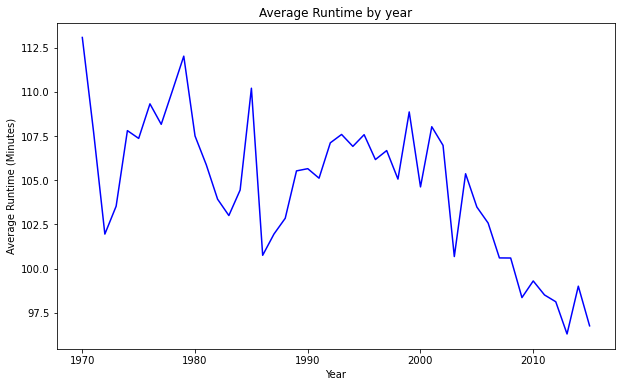

In [78]:
avg_run.plot(kind='line',color='blue',title='Average Runtime VS Years',figsize = (10,6))
plt.ylabel('Average Runtime (Minutes)')
plt.xlabel('Year')
plt.title('Average Runtime by year')

Interestingly, here we can see what we couldn't in the graph above. Despite fluctuations year on year, it appears that the average runtime in on the decline, especially in the latter years, with the average runtime dipping below 100 minutes for the first time in the mid 2000s. As we established before, there are more low budget independent movies in latter years, which may have an effect on the data, so we will also consider the restricted dataset.

Latly we want to see if the presence of zero budget movies is having an effect on the runtime

In [79]:
# Finding the mean runtime values for each year for the restricted dataset
avg_run_res = df_bud.groupby('year')['runtime'].mean()

Text(0.5, 1.0, 'Average Runtime by year')

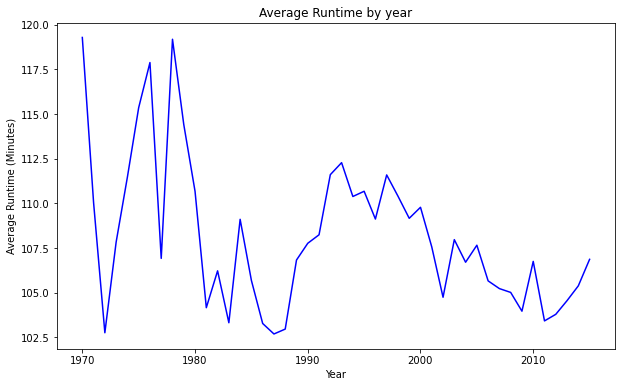

In [80]:
avg_run_res.plot(kind='line',color='blue',title='Average Runtime VS Years for non zero Budget movies',figsize = (10,6))
plt.ylabel('Average Runtime (Minutes)')
plt.xlabel('Year')
plt.title('Average Runtime by year')

From this graph we get very different results. The average runtime fluctuated a lot in between 1970 and 1980, but since then hasn't followed any particular trend. We can see that the presence of low-budget independent films in the latter years did have an effect on the average runtime for 2010 onwards, as these years no longer have the lowest average runtime, so one thing we can take away from this is that the low budget movies tend to be of shorter length.

### How does the Budget affect the Profit generated?


Seeing as we are dealing with independent and dependent variables with large amounts of continous data, scatter plots will offer the best representations from which to draw conclusions.

Text(0, 0.5, 'Gross Profit (£)')

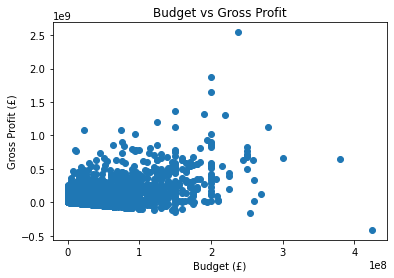

In [90]:
plt.scatter(df_clean.budget, df_clean.Gross_Profit)
plt.title('Budget vs Gross Profit')
plt.xlabel('Budget (£)')
plt.ylabel('Gross Profit (£)')

> The budget shows a slight correlation with Gross profit. Looking at the budget values above £2 million, we can see that the average position appears higher than that for the rest of the dataset. There is a lot of fluctuation in the values however, and the average will be brought down by the highest budget in the dataset of more than £400 million which lost nearly $50 million

### How does the Vote Average affect the Gross Profit?

Text(0, 0.5, 'Gross Profit (£)')

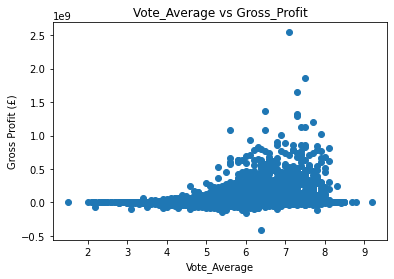

In [85]:
plt.scatter(df_clean.vote_average, df_clean.Gross_Profit)
plt.title('Vote_Average vs Gross_Profit')
plt.xlabel('Vote_Average')
plt.ylabel('Gross Profit (£)')

> The vote average shows a slight correlation, but only up to a point. It is interesting to see that the top 5 highest grossing films peak between a rating of 6.5 and a 7.5, and that there doesn't appear to be a single film above an 8 that scores in the top 15. In fact, it appears that the 5-10 films with the highest vote count actually didn't generate any money. 

### How does the Date the film was released affect the Profit?

In [ ]:
df_clean['release_date'] = df_clean['release_date']

Text(0, 0.5, 'Gross Profit (£)')

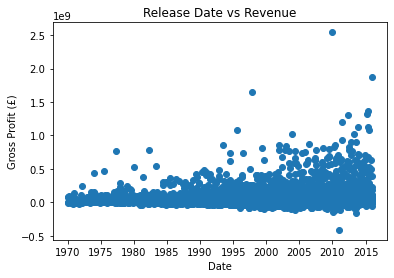

In [87]:
release_dates = df_clean['release_date']
GP = df_clean['Gross_Profit']
plt.plot_date(release_dates, GP)
plt.title('Release Date vs Revenue')
plt.xlabel('Date')
plt.ylabel('Gross Profit (£)')

Again here we can make a few observations. Even though the dataset doesn't follow a clear pattern, We can see that the top 15-20 highest grossing movies were all made later than 1995, and most of those highest grossing values appear to come after the year 2000. We also see the biggest loss made on a film by far comes just after 2010, with another value standing out just before 2015.